## 분류 (Classification) 총정리 

### 1.필요한 모듈 Import 

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt    
from IPython.display import Image
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline


In [3]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.2):
    # 마커와 컬러맵 설정하기
    markers=('s', 'x', 'o', '^', 'v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    # 결정경계를 그리기
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y=X[y==cl,1],
                   alpha=0.8, c=colors[idx],
                   marker=markers[idx], label=cl,
                   edgecolor='black')
        
    # 테스트 샘플을 부각하여 그리기
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1],
                   c='none', edgecolor='black',alpha=1.0,
                   linewidth=1, marker='o',
                   s=100, label='test set')

### 2. Iris Dataset 불러오기 

In [4]:
from sklearn import datasets

iris = datasets.load_iris()

data = iris.data
data.shape # iris.data: (150,4) 2d-array

X = iris.data[:, [2, 3]] # 2, 3번째 feature 만 사용
y = iris.target # iris.target: (150,) array  

print('Class labels:', np.unique(y))

print('Features names:', iris.feature_names)

Class labels: [0 1 2]
Features names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### 3. Train-Test Set 분리 
#### 데이터의 70%를 training에 사용하고 나머지 30%를 test data으로 사용하기 위해 **split**한다.<br>
이때 test_size는 test_set의 비율을 받고
**stratify=y**를 통해 traing과 test data의 **y비율이 같도록** 한다.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)
#stratify=y 조건 걸어서 [0,1,2] 비율 동일하게

In [6]:
X.shape

(150, 2)

In [8]:
y.shape

(150,)

In [9]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [10]:
X_test.shape

(45, 2)

In [12]:
y_train.shape

(105,)

### 4. X 정규화 (평균 0, 분산 1)

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
#표준 표준편차등의 기준 정하기

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print(np.mean(X_train_std), np.std(X_train_std))

1.0150610510858574e-16 0.9999999999999999


### Model 1 로지스틱 회귀

C:\Users\j2982\AppData\Local\Temp\ipykernel_22988\797945120.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0], y=X[y==cl,1],


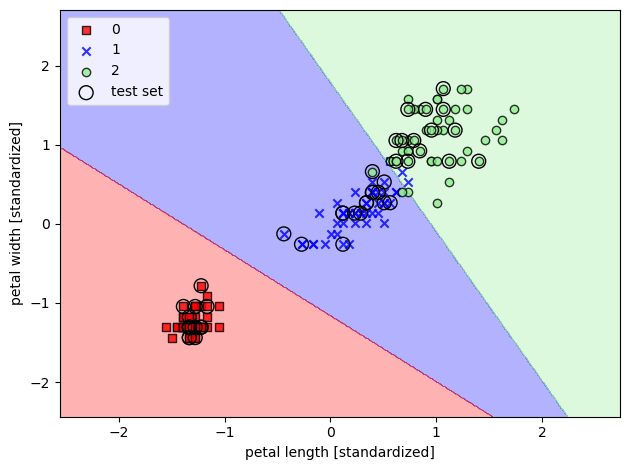

In [14]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

X_combined_std = np.vstack((X_train_std, X_test_std)) #vstack: 배열을 세로로 쌓기
y_combined = np.hstack((y_train, y_test)) #hstack: 배열을 가로로 쌓기

lr = LogisticRegression(C=100.0, random_state=1)#C가 커지면 정규화 강도 낮아짐 -> 베타들 값 커짐
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150) , resolution=0.01)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [19]:
np.vstack((X_train_std, X_test_std))

array([[-1.33269725, -1.30728421],
       [-1.16537974, -1.30728421],
       [ 0.84243039,  1.44587881],
       [ 1.0655204 ,  1.18367281],
       [-1.44424226, -1.30728421],
       [ 1.0097479 ,  1.57698181],
       [ 1.56747294,  1.18367281],
       [-1.44424226, -1.30728421],
       [ 1.12129291,  0.5281578 ],
       [ 0.45202286,  0.1348488 ],
       [-0.27301968, -0.2584602 ],
       [ 0.06161534,  0.2659518 ],
       [-1.38846976, -1.30728421],
       [ 0.50779537,  0.0037458 ],
       [ 0.11738784,  0.1348488 ],
       [ 0.73088538,  0.92146681],
       [-1.05383474, -1.30728421],
       [-0.16147468, -0.2584602 ],
       [ 0.06161534,  0.0037458 ],
       [-1.22115225, -1.30728421],
       [ 0.56356787,  0.79036381],
       [ 1.73479045,  1.44587881],
       [ 0.39625036,  0.3970548 ],
       [ 0.39625036,  0.1348488 ],
       [ 0.00584283, -0.1273572 ],
       [ 1.0097479 ,  1.57698181],
       [ 0.50779537,  0.2659518 ],
       [ 1.0097479 ,  0.2659518 ],
       [ 1.12129291,

In [18]:
np.hstack((y_train, y_test))

array([0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0,
       0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
       2, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1,
       1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 1, 1, 1,
       2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0, 0])

### Overfitting과 Regularization

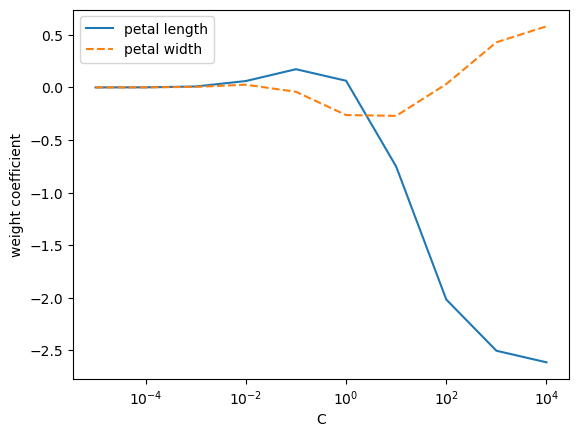

In [20]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1)
    #C값이 커지므로 정규화가 풀림(각 weight커짐)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

In [21]:
from sklearn.metrics import accuracy_score
weights, params = [], []
train_accr = []
test_accr = []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
    train_accr.append(accuracy_score(y_train, lr.predict(X_train_std)))
    test_accr.append(accuracy_score(y_test, lr.predict(X_test_std)))    

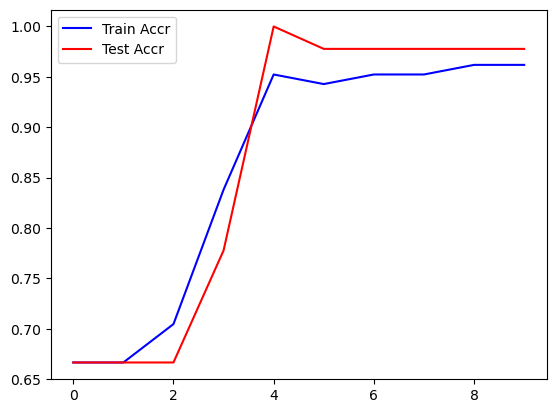

In [22]:
plt.plot(train_accr , c='blue', label='Train Accr')
plt.plot(test_accr , c='red', label='Test Accr')
plt.legend()
#plt.savefig('plot.pdf', dpi=300)
#5번째 c:0일때 best

## Model 2 KNN (K-nearest Neighbors)

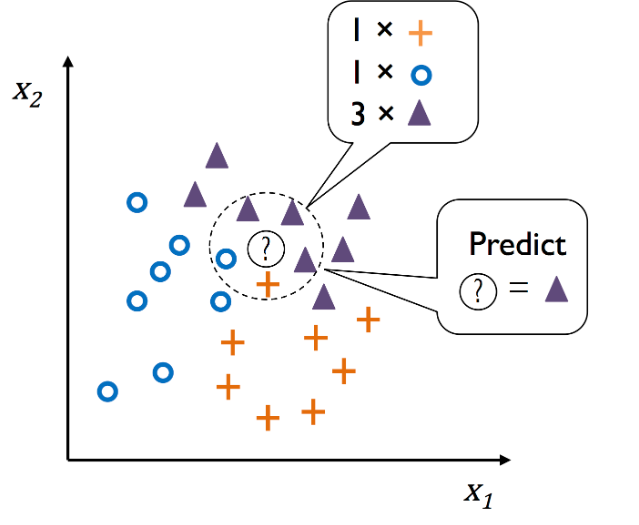

C:\Users\j2982\AppData\Local\Temp\ipykernel_22988\797945120.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0], y=X[y==cl,1],


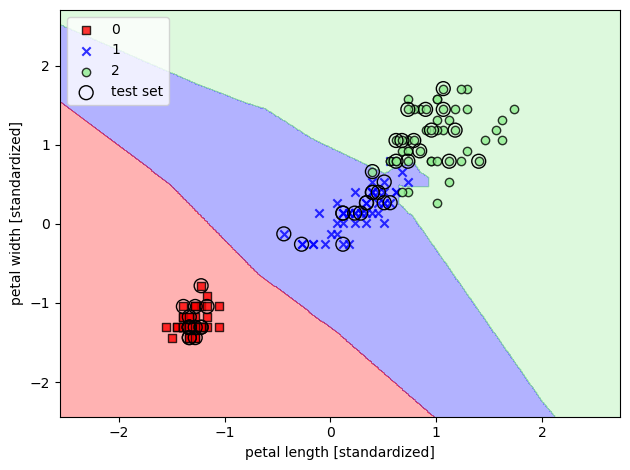

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, 
                           p=2, 
                           metric='minkowski')#유클리드거리 사용
#k커질 수록 결정경계 뭉툭해짐
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150), resolution=0.01)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [30]:
print('Train Accuracy: %.2f' % accuracy_score(y_train, knn.predict(X_train_std)))#train set 정확도가 100%안나옴 좌표값이 같은 데이터하나가 클래스 다름
print('Test Accuracy: %.2f' % accuracy_score(y_test, knn.predict(X_test_std)))

Train Accuracy: 0.99
Test Accuracy: 0.98


In [31]:
knn.predict(X_train_std)

array([0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0,
       0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
       2, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [32]:
y_train

array([0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0,
       0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
       2, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [33]:
X_train_std[69]

array([0.56356787, 0.79036381])

In [34]:
X_train_std[34]

array([0.56356787, 0.79036381])

In [35]:
y_train[34]

2

In [36]:
y_train[69]

1

## Model 3 Neural Networks

In [37]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(512,100), activation='relu') #hidden layer 2층 사용 (데이터 -> 512 차원 -> 100 차원 ->3차원(결과))
mlp.fit(X_train_std, y_train)


MLPClassifier(hidden_layer_sizes=(512, 100))

C:\Users\j2982\AppData\Local\Temp\ipykernel_22988\797945120.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0], y=X[y==cl,1],


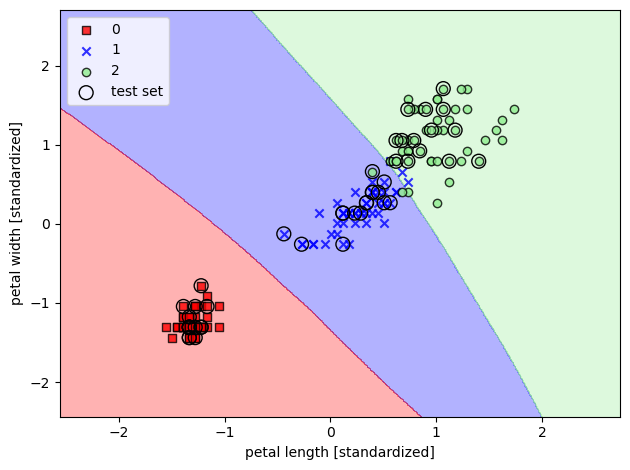

In [38]:
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=mlp, test_idx=range(105, 150) , resolution=0.01)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [39]:
print('Train Accuracy: %.2f' % accuracy_score(y_train, mlp.predict(X_train_std)))
print('Test Accuracy: %.2f' % accuracy_score(y_test, mlp.predict(X_test_std)))

Train Accuracy: 0.95
Test Accuracy: 0.98
